# RT analyses

- comparing during and after, and both with HCP RT's
- compare RT distributions for majority responses in coaxing and billiards (also other movies with similar RT profiles)


In [186]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats

In [187]:
final_data_folder = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/RT_online_task'
dat_all = pd.read_csv(os.path.join(final_data_folder,'RT_data_all_subs.csv'))
dat_all.head()

Unnamed: 0 respDur_keys  respDur_rt respAfter_keys  respAfter_rt  \
0           0         left    3.070585           left      0.868510   
1           1        right    1.909830          right      0.669700   
2           2        right    2.362310          right      0.497975   
3           3         left    4.312300           left      1.568915   
4           4        right    1.539055          right      0.667690   

                participant        movie                     date  movie_ind  \
0  60fd5d01137be0173165dcfe    COAXINGB0  2021-07-25_08h39.36.916        0.0   
1  60fd5d01137be0173165dcfe   BILLIARDA1  2021-07-25_08h39.36.916        1.0   
2  60fd5d01137be0173165dcfe   DRIFTINGA2  2021-07-25_08h39.36.916        2.0   
3  60fd5d01137be0173165dcfe     FISHING3  2021-07-25_08h39.36.916        3.0   
4  60fd5d01137be0173165dcfe  RANDOMMECH4  2021-07-25_08h39.36.916        4.0   

   consistency  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

### Analysis 1: is "during" RT predictive of "after RT"?

In [188]:
dat_all['logRTdur'] = np.log(dat_all['respDur_rt'])
dat_all['logRTaft'] = np.log(dat_all['respAfter_rt'])
dat_all['zRTdur'] = stats.zscore(dat_all['respDur_rt'])
dat_all['zRTaft'] = stats.zscore(dat_all['respAfter_rt'])
dat_all

Unnamed: 0 respDur_keys  respDur_rt respAfter_keys  respAfter_rt  \
0             0         left    3.070585           left      0.868510   
1             1        right    1.909830          right      0.669700   
2             2        right    2.362310          right      0.497975   
3             3         left    4.312300           left      1.568915   
4             4        right    1.539055          right      0.667690   
..          ...          ...         ...            ...           ...   
882        1014        right   11.273700          right      0.642000   
883        1015         left    7.740700           left      0.696100   
884        1016         left    4.984500           left      0.574300   
885        1018         left    0.688400           left      1.417700   
886        1019         left    4.391200           left      1.068900   

                  participant         movie                     date  \
0    60fd5d01137be0173165dcfe     COAXINGB0  2021-07-25_08h39.36.916   
1    60fd5d01137be0173165dcfe    BILLIARDA1  2021-07-25_08h39.36.916   
2    60fd5d01137be0173165dcfe    DRIFTINGA2  2021-07-25_08h39.36.916   
3    60fd5d01137be0173165dcfe      FISHING3  2021-07-25_08h39.36.916   
4    60fd5d01137be0173165dcfe   RANDOMMECH4  2021-07-25_08h39.36.916   
..                        ...           ...                      ...   
882  60fd20e2fcd0da955a2b7b3c   RANDOMMECH4  2021-07-25_16h57.42.386   
883  60fd20e2fcd0da955a2b7b3c      SCARING5  2021-07-25_16h57.42.386   
884  60fd20e2fcd0da955a2b7b3c    SEDUCINGB6  2021-07-25_16h57.42.386   
885  60fd20e2fcd0da955a2b7b3c  SURPRISINGB8  2021-07-25_16h57.42.386   
886  60fd20e2fcd0da955a2b7b3c      TENNISA9  2021-07-25_16h57.42.386   

     movie_ind  consistency  logRTdur  logRTaft    zRTdur    zRTaft  
0          0.0          1.0  1.121868 -0.140976 -0.814168 -0.018935  
1          1.0          1.0  0.647014 -0.400925 -1.118946 -0.444729  
2          2.0          1.0  0.859640 -0.697205 -1.000139 -0.812515  
3          3.0          1.0  1.461471  0.450384 -0.488131  1.481131  
4          4.0          1.0  0.431169 -0.403931 -1.216301 -0.449034  
..         ...          ...       ...       ...       ...       ...  
882        4.0          1.0  2.422473 -0.443167  1.339719 -0.504055  
883        5.0          1.0  2.046492 -0.362262  0.412062 -0.388188  
884        6.0          1.0  1.606333 -0.554603 -0.311632 -0.649048  
885        8.0          1.0 -0.373385  0.349036 -1.439657  1.157272  
886        9.0          1.0  1.479603  0.066630 -0.467415  0.410242  

[887 rows x 14 columns]

(0.15005411939268337, 7.185247330567464e-06)

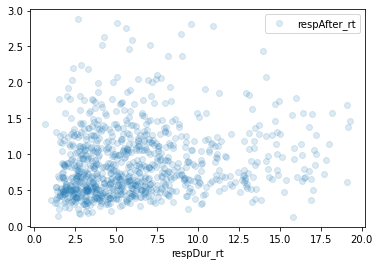

In [189]:
dat_all.plot(x='respDur_rt', y='respAfter_rt', style='o', alpha = .15)
#dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
stats.pearsonr(dat_all['respDur_rt'],dat_all['respAfter_rt'])

(0.15005411939268337, 7.185247330567464e-06)

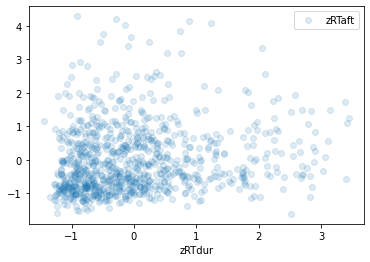

In [190]:
dat_all.plot(x='zRTdur', y='zRTaft', style='o', alpha = .15)
#dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
stats.pearsonr(dat_all['zRTdur'],dat_all['zRTaft'])

In [191]:
stats.spearmanr(dat_all['respDur_rt'],dat_all['respAfter_rt'])

SpearmanrResult(correlation=0.19780509361240778, pvalue=2.821947082021859e-09)

In [192]:
stats.spearmanr(dat_all['zRTdur'],dat_all['zRTaft'])

SpearmanrResult(correlation=0.19780509361240778, pvalue=2.821947082021859e-09)

(0.19882252677273982, 2.3318904219679807e-09)

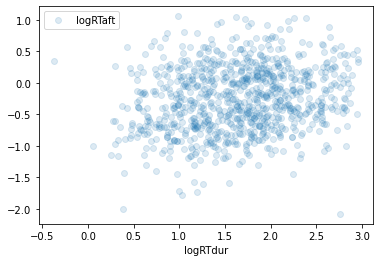

In [193]:
# log transformed RTs

dat_all.plot(x='logRTdur', y='logRTaft', style='o', alpha = .15)
#dat_all['logRTdur'].corr(dat_all['logRTaft'])
stats.pearsonr(dat_all['logRTdur'],dat_all['logRTaft'])

In [194]:
HCP_data_file = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/BehaviorAnalyses/hcp_social_behav_for_ddm_stim-coding.csv'
hcp_behdata = pd.read_csv(HCP_data_file)
hcp_behdata = hcp_behdata.loc[hcp_behdata['rt']>.1,:]
hcp_behdata.head()

subj_idx    stim             movie     rt  response
0    168745  Mental       Scaring.AVI  1.252         1
1    168745  Mental    SEDUCING-B.AVI  0.578         1
2    168745  Random        STAR-A.AVI  1.643         0
3    168745  Mental  SURPRISING-B.AVI  1.082         1
4    168745  Random      TENNIS-A.AVI  1.232         0

In [195]:
movie_names = ['COAXINGB0','BILLIARDA1','DRIFTINGA2','FISHING3','RANDOMMECH4',
              'SCARING5', 'SEDUCINGB6', 'STARA7', 'SURPRISINGB8', 'TENNISA9']

movies_hcp_list = hcp_behdata['movie'].values
movie_ind_list = np.empty((movies_hcp_list.shape[0],))
for i,m in enumerate(movies_hcp_list):
    for j in range(10):
        if movie_names[j][:4] in str.upper(m):
            movie_ind_list[i] = j
            break

hcp_behdata['movie_ind'] =  movie_ind_list
hcp_behdata['logRT'] = np.log(hcp_behdata['rt'])
hcp_behdata['zRT'] = stats.zscore(hcp_behdata['rt'])
print(count)
hcp_behdata

10149


subj_idx    stim                  movie     rt  response  movie_ind  \
0        168745  Mental            Scaring.AVI  1.252         1        5.0   
1        168745  Mental         SEDUCING-B.AVI  0.578         1        6.0   
2        168745  Random             STAR-A.AVI  1.643         0        7.0   
3        168745  Mental       SURPRISING-B.AVI  1.082         1        8.0   
4        168745  Random           TENNIS-A.AVI  1.232         0        9.0   
...         ...     ...                    ...    ...       ...        ...   
10144    175136  Mental          COAXING-B.AVI  1.542         1        0.0   
10145    175136  Random         BILLIARD-A.AVI  0.893         0        1.0   
10146    175136  Random         DRIFTING-A.AVI  0.895         0        2.0   
10147    175136  Mental            Fishing.AVI  0.985         1        3.0   
10148    175136  Random  Random mechanical.AVI  1.304         0        4.0   

          logRT       zRT  
0      0.224742  0.415506  
1     -0.548181 -0.940478  
2      0.496524  1.202138  
3      0.078811  0.073492  
4      0.208639  0.375269  
...         ...       ...  
10144  0.433080  0.998941  
10145 -0.113169 -0.306746  
10146 -0.110932 -0.302723  
10147 -0.015114 -0.121657  
10148  0.265436  0.520122  

[9950 rows x 8 columns]

In [196]:
dat_all.groupby(['movie_ind']).mean().logRTdur

movie_ind
0.0    1.352411
1.0    1.295999
2.0    1.689224
3.0    1.950964
4.0    1.778285
5.0    2.236313
6.0    1.541536
7.0    1.555364
8.0    1.616493
9.0    1.482265
Name: logRTdur, dtype: float64

In [126]:
hcp_behdata.groupby(['movie_ind']).mean().logRT

movie_ind
0.0    0.176325
1.0    0.141436
2.0   -0.048315
3.0    0.106058
4.0    0.070830
5.0   -0.120297
6.0   -0.281009
7.0   -0.329794
8.0   -0.176279
9.0   -0.053283
Name: logRT, dtype: float64

In [122]:
dat_all.groupby(['movie']).mean().logRTdur

movie
BILLIARDA1      1.295999
COAXINGB0       1.352411
DRIFTINGA2      1.689224
FISHING3        1.950964
RANDOMMECH4     1.778285
SCARING5        2.236313
SEDUCINGB6      1.541536
STARA7          1.555364
SURPRISINGB8    1.616493
TENNISA9        1.482265
Name: logRTdur, dtype: float64

In [127]:
hcp_behdata.groupby(['movie']).mean().logRT

movie
BILLIARD-A.AVI           0.141436
COAXING-B.AVI            0.176325
DRIFTING-A.AVI          -0.048315
Fishing.AVI              0.106058
Random mechanical.AVI    0.070830
SEDUCING-B.AVI          -0.281009
STAR-A.AVI              -0.329794
SURPRISING-B.AVI        -0.176279
Scaring.AVI             -0.120297
TENNIS-A.AVI            -0.053283
Name: logRT, dtype: float64

SpearmanrResult(correlation=0.4545454545454545, pvalue=0.186904810349332)

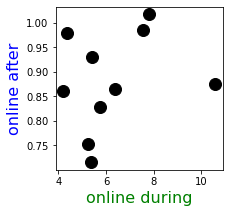

In [230]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               dat_all.groupby(['movie_ind']).mean().respAfter_rt,marker ='o', color = 'k',ls = 'None', markersize = 12)
plt.xlabel('online during',fontsize =16, color='g')
plt.ylabel('online after',fontsize =16,color = 'b')
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               dat_all.groupby(['movie_ind']).mean().respAfter_rt)
# for comparability with other coorels below. In general, timept-wise analysis  above makes more sense

In [180]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().zRTdur,
               dat_all.groupby(['movie_ind']).mean().zRTaft)
# for comparability with other coorels below. In general, timept-wise analysis  above makes more sense

SpearmanrResult(correlation=0.4545454545454545, pvalue=0.186904810349332)

In [137]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTdur,
               dat_all.groupby(['movie_ind']).mean().logRTaft)
# same as above, but log RTs

SpearmanrResult(correlation=0.29696969696969694, pvalue=0.4047016712701569)

SpearmanrResult(correlation=-0.12727272727272726, pvalue=0.7260570147627894)

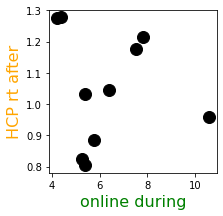

In [226]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt,marker ='o', ls = 'None', markersize = 12,color = 'k')
plt.xlabel('online during',fontsize =16,color = 'g')
plt.ylabel('HCP rt after',fontsize =16, color = 'orange')

stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt)
# comparing mean "during RTs" with mean HCP RTs
# using meadian instead of mean reduced p values to .38

SpearmanrResult(correlation=0.7212121212121211, pvalue=0.018573155089460208)

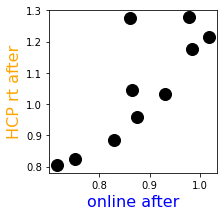

In [224]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respAfter_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt,marker ='o', color = 'k',ls = 'None', markersize = 12)
plt.xlabel('online after',fontsize =16,color = 'b')
plt.ylabel('HCP rt after',fontsize =16,color ='orange')

stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respAfter_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt)
# comparing mean "during RTs" with mean HCP RTs
# using meadian instead of mean reduced p values to .38

In [149]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTdur,
               hcp_behdata.groupby(['movie_ind']).mean().logRT)
# same as above, but log RTs
# using meadian instead of mean reduced p values to .38

SpearmanrResult(correlation=-0.2121212121212121, pvalue=0.5563057751029299)

In [168]:
dat_all.groupby(['movie_ind']).mean().respDur_rt.values

array([ 4.37188892,  4.20324122,  6.37767053,  7.81966079,  7.54110409,
       10.58758904,  5.24302737,  5.38617539,  5.74724229,  5.39606375])

([<matplotlib.axis.XTick at 0x7fb2ebca83a0>,
 [Text(0, 0, 'COAXINGB0'),
  Text(1, 0, 'BILLIARDA1'),
  Text(2, 0, 'DRIFTINGA2'),
  Text(3, 0, 'FISHING3'),
  Text(4, 0, 'RANDOMMECH4'),
  Text(5, 0, 'SCARING5'),
  Text(6, 0, 'SEDUCINGB6'),
  Text(7, 0, 'STARA7'),
  Text(8, 0, 'SURPRISINGB8'),
  Text(9, 0, 'TENNISA9')])

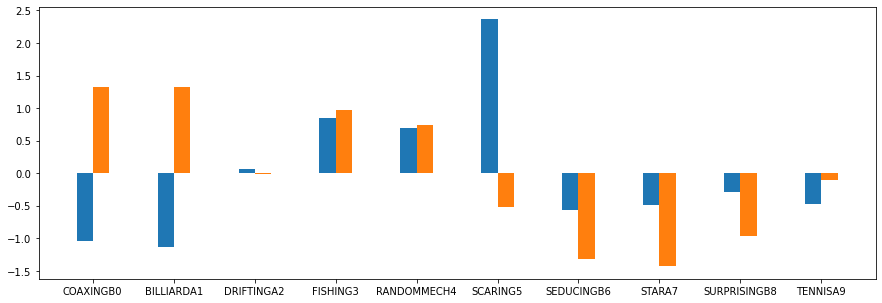

In [167]:
plt.figure(1,figsize =(15,5))
plt.bar(np.arange(0,10),stats.zscore(dat_all.groupby(['movie_ind']).mean().respDur_rt.values), align='edge', 
        width = -.2, label = 'Z-online-during')
plt.bar(np.arange(0,10),stats.zscore(hcp_behdata.groupby(['movie_ind']).mean().rt.values), align='edge', 
        width = .2, label = 'Z-HCP-after')
plt.xticks(range(10),movie_names)

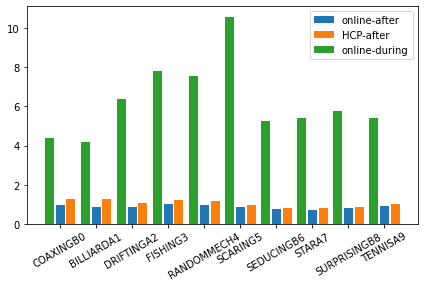

In [220]:
plt.figure(1,figsize =(7,4))
plt.bar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
        align='center', width = .25, label = 'online-after')
plt.bar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt, 
        align='center', width = .25, label = 'HCP-after')
plt.bar(np.arange(0,10)-.3,dat_all.groupby(['movie_ind']).mean().respDur_rt, 
        align='center', width = .25, label = 'online-during')

plt.xticks(range(10),movie_names,rotation=30)
plt.legend()

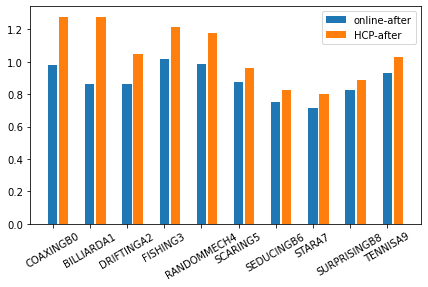

In [221]:
plt.figure(1,figsize =(7,4))

plt.bar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
        align='center', width = .25, label = 'online-after')
plt.bar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt, 
        align='center', width = .25, label = 'HCP-after')
plt.xticks(range(10),movie_names,rotation=30)
plt.legend()

In [141]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTaft,
               hcp_behdata.groupby(['movie_ind']).mean().logRT)
# same as above, but log RTs

SpearmanrResult(correlation=0.6484848484848483, pvalue=0.04254012768448945)

- overall, it looks like in the online RT expt, during and after responses correlated
- but taking means per movie and correlating gives a sig correlation only for online-after and hcp-after, not online-during and hcp after. prob because of the variability in online-during (for example, online during and after also were not significant here)

- NEED TO REPEAT THIS WITH CONSISTENT+INCONSISTENT RESPONSES OR RESPONSE FLIPPING TRIALS ALONE OF INCONSISTENT TRIALS, SINCE HERE THERE WAS ONLY CONSISTENT: SO RT'S MAY HAVE BEEN SKEWED

## Identify the most similar distributions (majority)

E.g. see if coaxing-yes and billiards-no are sig. different

### Analysis 3: deciding on which two movies and comapring them

In [184]:

mat1 = dat_all.loc[(dat_all['movie']== movie_names[0]) & (dat_all['respDur_keys']== 'left'),'respDur_rt'].values
mat2 = dat_all.loc[(dat_all['movie']== movie_names[1]) & (dat_all['respDur_keys']== 'right'),'respDur_rt'].values

from scipy.stats import ks_2samp
ks_2samp(mat1,mat2)

KstestResult(statistic=0.15053763440860216, pvalue=0.24350006240630304)